In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')
print(data.head())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

Handling Missing Values:
If the goal is to predict the 'Price' variable, we can drop rows where 'Price' is missing.

In [5]:
data = data.dropna(subset=['Price'])

Descriptive Analysis:
For continuous variables, summary statistics like mean, median, standard deviation, min, max values can be computed. For categorical variables, we can calculate the frequency of each category.

In [6]:
data.describe(include='all')  # This will give summary statistics for all columns.


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,27247,27247,27247.000000,27247,2.724700e+04,27247,27247,27247,27246.000000,27246.000000,...,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,27244,20993.000000,20993.000000,27244,27244.000000
unique,345,26751,NaN,3,NaN,5,349,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Nelson,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,727,4,NaN,18472,NaN,17515,2735,879,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2520,NaN,NaN,8524,NaN
mean,NaN,NaN,2.992293,NaN,1.050173e+06,NaN,NaN,NaN,11.280276,3113.796080,...,1.591683,1.715370,593.488933,156.834586,1966.609153,NaN,-37.806963,144.996711,NaN,7566.781089
std,NaN,NaN,0.954795,NaN,6.414671e+05,NaN,NaN,NaN,6.787469,111.139676,...,0.700880,0.994216,3757.266429,449.222791,36.762373,NaN,0.091619,0.120680,NaN,4492.382418
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3046.000000,...,1.000000,1.000000,219.000000,100.000000,1950.000000,NaN,-37.860900,144.925300,NaN,4294.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.500000,3088.000000,...,1.000000,2.000000,512.000000,133.000000,1970.000000,NaN,-37.800460,145.003200,NaN,6567.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3153.000000,...,2.000000,2.000000,664.000000,182.000000,2000.000000,NaN,-37.748970,145.068770,NaN,10412.000000


Data Transformation:

Log Transformation: Continuous variables like 'Price' which might be skewed can benefit from a log transformation.

In [7]:
data['LogPrice'] = np.log(data['Price'])



Date Variables: Convert them into separate year, month, and day columns or calculate the difference from a reference date.

In [8]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month


<ipython-input-8-c0235bd98d37>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Year'] = pd.to_datetime(data['Date']).dt.year
<ipython-input-8-c0235bd98d37>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Month'] = pd.to_datetime(data['Date']).dt.month


Text Variables: These may need more complex processing like natural language processing or they can be transformed into categorical variables if they have a limited set of values.

Categorical Variables: Convert them into dummy/indicator variables using one-hot encoding.

In [9]:
data = pd.get_dummies(data, columns=['Suburb', 'CouncilArea'], drop_first=True)

In [10]:
#checking for columns if they exist
print(data.columns)

Index(['Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2',
       ...
       'CouncilArea_Moorabool Shire Council',
       'CouncilArea_Moreland City Council',
       'CouncilArea_Nillumbik Shire Council',
       'CouncilArea_Port Phillip City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whitehorse City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council'],
      dtype='object', length=398)


2. Plots:
To visualize the distribution of the data and the relationships between variables, you can use various plots. Histograms for continuous variables, bar plots for categorical variables, scatter plots to check the relationship between two continuous variables, etc. Python's matplotlib and seaborn libraries are handy for this.

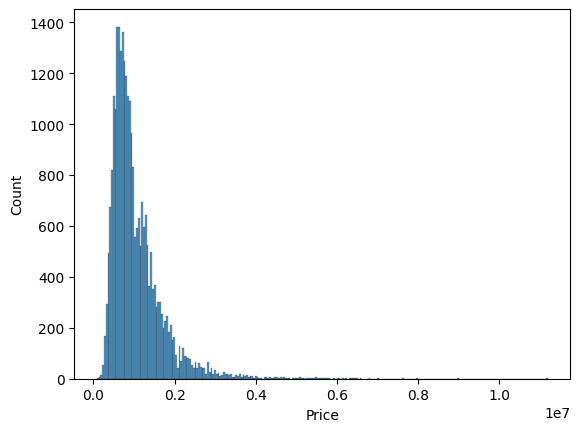

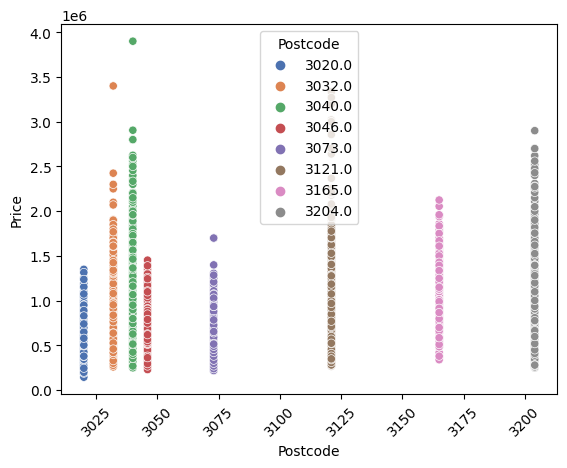

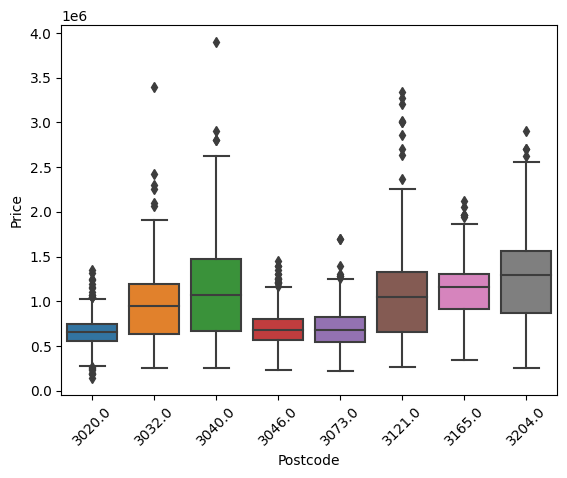

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Price
sns.histplot(data['Price'])
plt.show()

# Scatter plot for Price by different Postcodes (top 10 for illustration)
top_postcodes = data['Postcode'].value_counts().index[:8]
filtered_data = data[data['Postcode'].isin(top_postcodes)]
sns.scatterplot(data=filtered_data, x='Postcode', y='Price', hue='Postcode', palette="deep")
plt.xticks(rotation=45)
plt.show()

# Boxplot for Price by different Postcodes
sns.boxplot(data=filtered_data, x='Postcode', y='Price')
plt.xticks(rotation=45)
plt.show()



Discussion on Regression Analysis:
Once you have processed the data, you would want to analyze which variables might be most predictive for 'Price'. Features should be selected based on domain knowledge, correlation with the target variable, and other statistical methods like backward elimination or regularization techniques.
This is a high-level overview and breakdown of the given problem. Remember, in actual data analysis, each of these steps might require deeper investigation, and data preprocessing is iterative. The exact methods and the order of steps may vary based on the nature and quality of your dataset.

#part 2
Given the challenge you've outlined, here's a suggested strategy to approach and solve the clustering problem for the Melbourne housing market dataset:

**1. Understanding the Data:**
   - Start by loading the data into a suitable data frame using libraries like `pandas`.
   - Examine the first few rows, check for missing values, and understand the structure of the dataset.

**2. Data Preprocessing:**
   - **Handle Missing Values:** Remove or impute the missing data. For categorical data, you can replace missing values with the most frequent category. For numerical data, you can use the mean or median.
   - **Feature Engineering:** From the description, for example, you can derive new features such as 'Age of House' from the year it was built.
   - **Standardization:** Since clustering algorithms like KMeans are sensitive to the scale of the data, standardize or normalize the dataset.

**3. Feature Selection:**
   - Remember, you shouldn't use the Price variable.
   - Choose variables that might logically contribute to the differences among houses. Features like location, number of rooms, type of house, etc., are good starting points.
   - Consider using dimensionality reduction techniques like PCA (Principal Component Analysis) if the dataset has a very large number of features.

**4. Choose a Clustering Algorithm:**
   - **KMeans:** This is a commonly used algorithm for clustering. However, you'll need to determine the number of clusters (K). The Elbow Method and Silhouette Analysis are good techniques for this.
   - **DBSCAN:** This is another clustering algorithm which doesn't require specifying the number of clusters beforehand and can identify clusters of various shapes.
   - **Agglomerative Clustering:** This is a hierarchical clustering method.

**5. Training the Model:**
   - Once you've selected the algorithm and features, train the clustering model on the data.

**6. Evaluate & Visualize Clusters:**
   - **Evaluation:** Since this is unsupervised learning, evaluation is more subjective. However, you can use metrics like the Silhouette Score or Davies-Bouldin Index to get a sense of how well-separated your clusters are.
   - **Visualization:** Use scatter plots, possibly with the first two principal components if you've applied PCA, to visualize your clusters. You can also use tools like `seaborn` or `matplotlib` for this.

**7. Interpretation:**
   - Analyze the clusters you've formed and try to interpret them in terms of the characteristics they represent. For example, a cluster could represent "Large houses in prime locations" or "Small apartments in the city outskirts".
   - These interpretations can then be used to inform a predictive model for house prices.

**8. Documentation & Presentation:**
   - Clearly describe your approach, the algorithms you tried, the rationale behind choosing specific features, and the number of clusters.
   - Demonstrate your findings through visuals - bar graphs, scatter plots, etc.
   - Interpret your results: Highlight the significance of each cluster, and speculate how these clusters might be of use in predicting house prices.

**Why This Strategy?**
   - Clustering can help identify inherent groupings within the data that might not be obvious at first glance.
   - By understanding these groupings, a predictive model can then be designed to specifically cater to each cluster's characteristics, potentially improving accuracy.
   - The above approach is systematic and comprehensive, ensuring you've considered multiple aspects before drawing conclusions.


# Import necessary libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load the data

In [13]:
# 1. Load the data
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')

# 2. Preprocessing:

In [14]:
# Preprocessing
# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


# Feature engineering: Adding 'Age of House' feature
data['YearBuilt'] = data['YearBuilt'].fillna(np.mean(data['YearBuilt']))
data['Age_of_House'] = 2023 - data['YearBuilt']

# Drop columns that won't be used for clustering
data = data.drop(columns=['Address', 'Price', 'YearBuilt', 'Date'])

# Encode categorical variables
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Feature Selection (for simplicity, we'll use the standardized data as it is)

# 4. Find optimal number of clusters using the Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

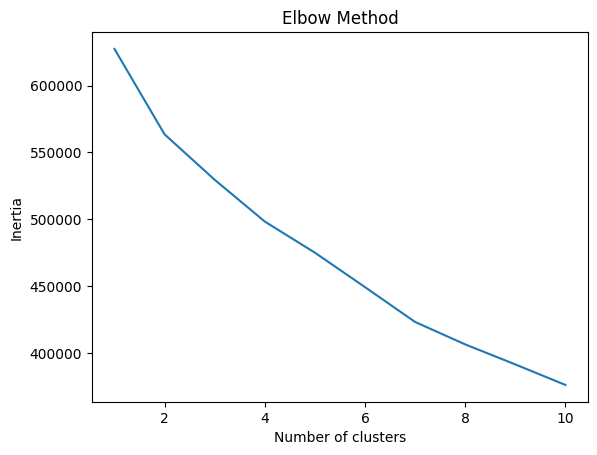

In [15]:
# 4. Find optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Let's assume optimal number of clusters from the plot is 'k'

# 5. Train the model

In [16]:
# 5. Train the model
k = 3  # Replace with your optimal number from the plot
kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 6. Evaluate & Visualize Clusters using PCA for 2D visualization

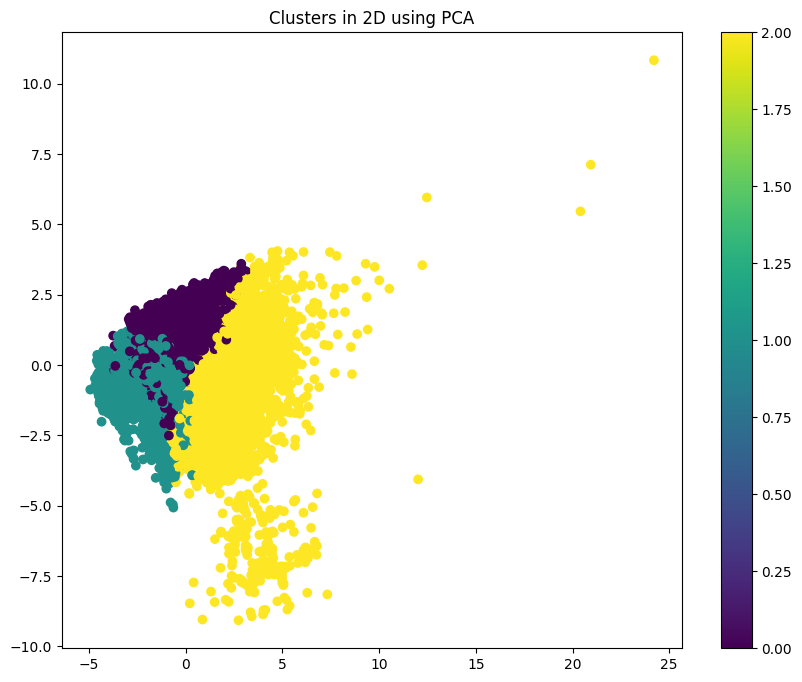

Silhouette Score: 0.09130983838062573


In [17]:
# 6. Evaluate & Visualize Clusters using PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
plt.title('Clusters in 2D using PCA')
plt.colorbar()
plt.show()

# Check silhouette score
print(f'Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_)}')

# 7. Interpretation (sample)

In [18]:
# 7. Interpretation (sample)
print(data.groupby('Cluster').mean())

# This will show the average values of features for each cluster, which you can use for interpretation.

             Suburb     Rooms      Type    Method     SellerG   Distance  \
Cluster                                                                    
0        188.070669  3.035538  0.071143  2.644080  190.806607   9.748609   
1        179.886830  2.017111  1.830068  2.911376  194.020061   7.995362   
2        144.523084  3.765289  0.139104  2.656417  169.926529  15.340508   

            Postcode  Bedroom2  Bathroom       Car    Landsize  BuildingArea  \
Cluster                                                                        
0        3076.421715  3.004738  1.529818  1.688621  487.994043    139.643906   
1        3107.758674  2.392613  1.536346  1.484777  482.635945    120.742931   
2        3172.563738  3.631525  2.076055  2.162016  735.115676    171.210029   

         CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  \
Cluster                                                                  
0          15.217153 -37.780304  144.944997    4.050565    7573.542950